In [8]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('QRdummydata.csv')
df = df.drop(columns = "Unnamed: 0")
df

,HSG,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,...,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,3,770,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,680,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4,730,0.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,790,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,800,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3,770,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1236,4,750,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,4,780,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1238,3,800,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation Plot

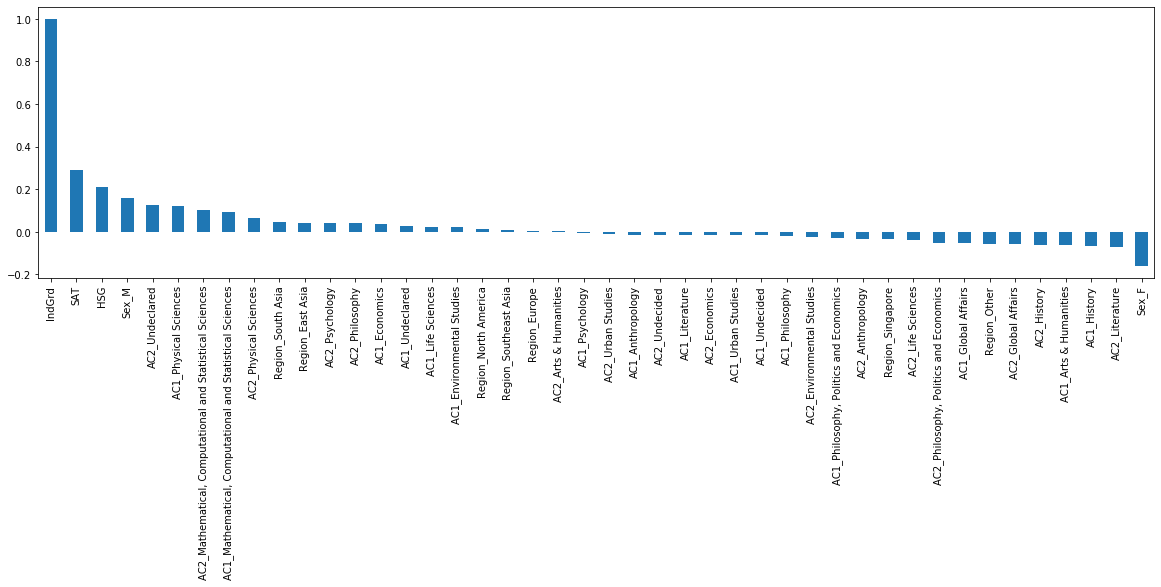

In [10]:
df.corr()['IndGrd'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [12]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['IndGrd'], axis=1)
X = X1.values
y = df['IndGrd'].values #IndGrd is our predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
logreg = LogisticRegression() #instanciating the Logistic Regression model
logreg.fit(X_train, y_train) #Fitting the Logistic Regression model
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)
score = logreg.score(X_test, y_test) #Shows the Model accuracy 
print(score) #80.6% model accuracy

0.8064516129032258


Our model is 80.6% accurate! Now we use it to predict classes and probabilities using the trained model on the test set, which is shown as follows. We also print the confusion matrix shown in the next chunk.

In [14]:
logreg.predict_proba(X)

array([[0.72429514, 0.27570486],
       [0.72542586, 0.27457414],
       [0.8084924 , 0.1915076 ],
       ...,
       [0.69071094, 0.30928906],
       [0.96732402, 0.03267598],
       [0.92498447, 0.07501553]])

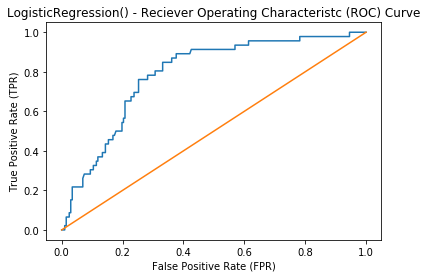

Area Under Curve (AUC) Score: 0.7870749031424882



In [15]:
def ROC(X_test, y_test, y_pred_logreg_prob, logreg):
    y_pred_prob = y_pred_logreg_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{logreg}')
    plt.plot([0, 1], [0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{logreg} - Reciever Operating Characteristc (ROC) Curve')
    plt.show()
    return print(f'Area Under Curve (AUC) Score: {roc_auc_score(y_test, y_pred_prob)}\n');

ROC(X_test,y_test,y_pred_logreg_prob,logreg)

In [16]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       202
         1.0       0.38      0.07      0.11        46

    accuracy                           0.81       248
   macro avg       0.60      0.52      0.50       248
weighted avg       0.74      0.81      0.75       248



In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [18]:
logreg = LogisticRegression(max_iter=1100)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

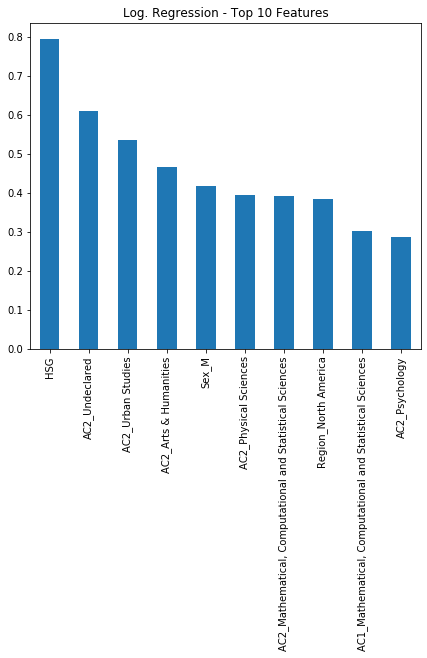

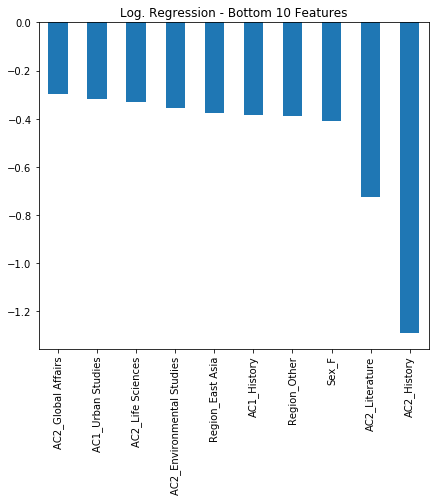

In [19]:
# Plot model evaluations.
feature_weights(X1, logreg, 'Log. Regression')

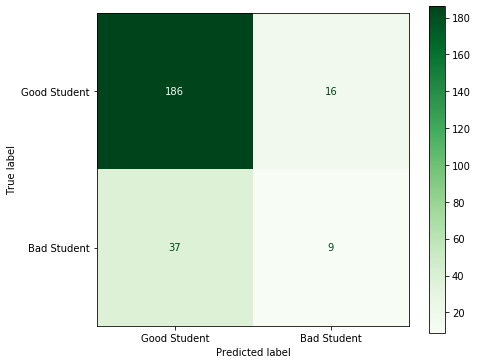

In [20]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(logreg, X_test, y_test, display_labels=["Good Student", "Bad Student"], ax=ax, cmap='Greens')

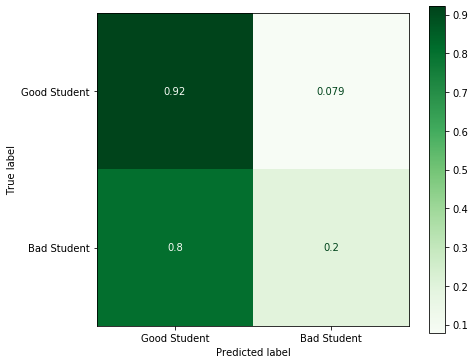

In [21]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(logreg, X_test, y_test, display_labels=["Good Student", "Bad Student"], ax=ax, normalize = 'true',cmap='Greens')

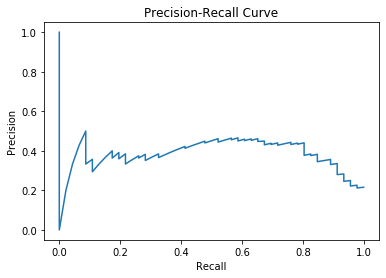

F1 Score: 0.2535211267605634 
AUC Score (PR): 0.38071906572395803



In [22]:
def PRC(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.title('Precision-Recall Curve')
    plt.show()
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

PRC(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')